# AUC vs X mass
Notebook to compare AUC or other saved performance feature vs mass

The AUC has to be saved as a stacked dictionary following structure

```
{"regionname1": 
    { mass1:[score in u, score in c],
      mass2:[...],
      ...
      },
 "regionname2": {},...
}
```

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import matplotlib.ticker as tck
from joblib import load

fpath = os.path.join(rcParams["datapath"], "/nfs/pic.es/user/s/salvador/arial.ttf")
fbipath = os.path.join(rcParams["datapath"], "/nfs/pic.es/user/s/salvador/ArialBoldItalic.ttf")

def ATLAS(ylims,perc):
    #gets axis coordinates in units of %
    width=ylims[1]-ylims[0]
    return ylims[0]+width*perc

## Comparison in different evaluations

In [2]:
Input = "tXqML/Models/NewTrain3_MP/Eval/fold0/AUC_"
Output = "tXqML/Models/NewTrain3_MP/Eval/"
Train0_MP_q = load(Input+"q.sav")
Train0_MP_u = load(Input+"u.sav")
Train0_MP_c = load(Input+"c.sav")

all
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-3-dfecb17e016a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


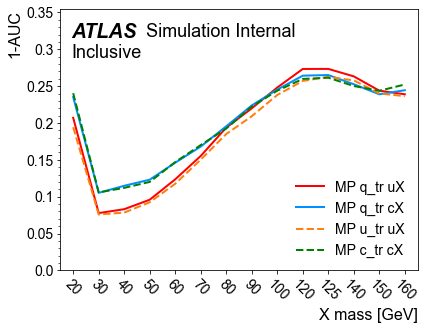

c1l4jex3bex
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-3-dfecb17e016a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


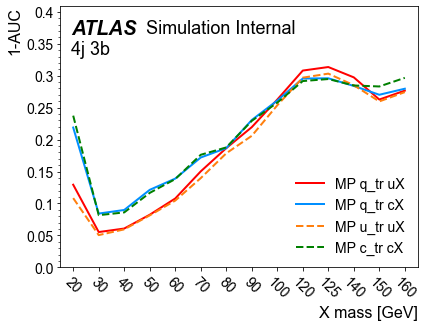

c1l4jex4bin
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-3-dfecb17e016a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


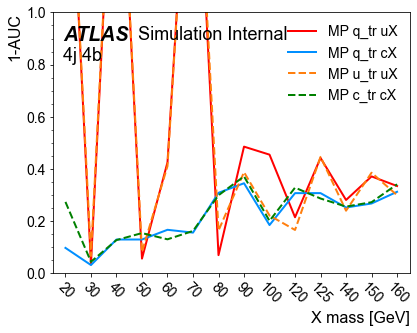

c1l5jex3bex
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-3-dfecb17e016a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


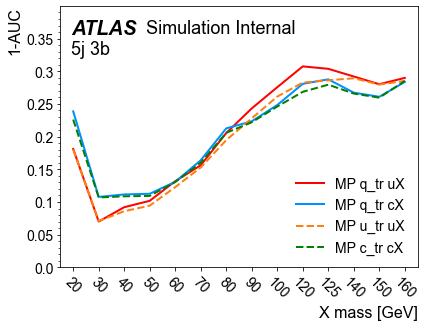

c1l5jex4bin
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-3-dfecb17e016a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


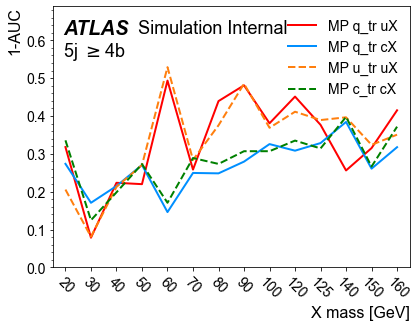

c1l6jin3bex
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-3-dfecb17e016a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


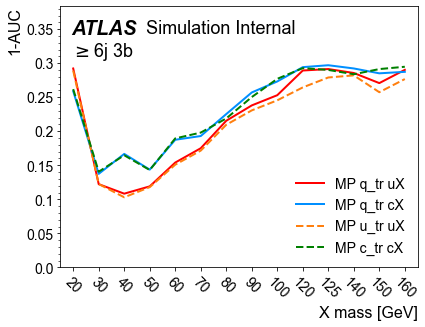

c1l6jin4bin
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-3-dfecb17e016a>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


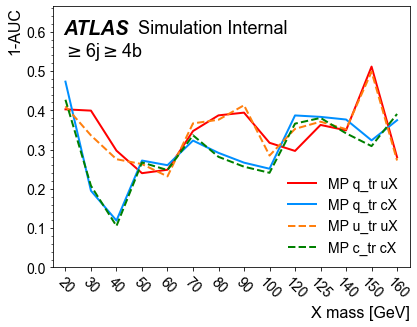

In [3]:
labels = {'all': "Inclusive","c1l4jex3bex": "4j 3b","c1l4jex4bin": r'4j 4b', "c1l5jex3bex":"5j 3b", "c1l5jex4bin": "5j "+r'$\geq$'+"4b",
                  "c1l6jin3bex": r'$\geq$6j'+" 3b","c1l6jin4bin": r'$\geq$6j$\geq$4b'}
regions= ['all'             ,'c1l4jex3bex'         ,'c1l4jex4bin'               , 'c1l5jex3bex'        , 'c1l5jex4bin',
                  'c1l6jin3bex'                   ,'c1l6jin4bin']

objects = [Train0_MP_q,Train0_MP_u,Train0_MP_c] #Put here the AUCs to plot
nameobjects = ["MP q_tr","MP u_tr","MP c_tr"] #Put here the names of the trainings
colorsu = ["red","tab:orange","tab:orange"] #Put here the color of the u evaluations
colorsc = [[0.,0.5615942,1.,1.],"green","green"] #Put here the color of c evaluations
styles = ["-","--","--"] #Put here the style of the trainigns

allmasses = [20,30,40,50,60,70,80,90,100,120,125,140,150,160]
for region in regions:
    print(region)
    plt.figure(figsize=(6.4,4.8),linewidth=0)
    for clf, nameclf,coloru,colorc,style in zip(objects, nameobjects,colorsu,colorsc,styles): #Iterate over trainings
        Xlist=list(clf[region].keys())
        Xlist.sort()
        print (nameclf, len(clf[region]))
        if "q_tr" in nameclf or "u_tr" in nameclf:   #Line for u score. If the score does not exist, skips the point
            plt.plot(np.arange(1,len(allmasses)+1,1),[1.-clf[region][i][0] if i in Xlist else None for i in allmasses],label=nameclf+" uX",linewidth=2,color=coloru, linestyle=style)
        if "q_tr" in nameclf or "c_tr" in nameclf:   #Line for c score
            plt.plot(np.arange(1,len(allmasses)+1,1),[1.-clf[region][i][1] if i in Xlist else None for i in allmasses],label=nameclf+" cX",linewidth=2,color=colorc, linestyle=style)
        
    plt.xlabel(r'X mass [GeV]',horizontalalignment='right',x=1,fontproperties=fm.FontProperties(fname=fpath,size=16))
    plt.ylabel("1-AUC",horizontalalignment='right',y=1,fontproperties=fm.FontProperties(fname=fpath,size=16))
    plt.xticks(np.arange(1,len(allmasses)+1,1))
    plt.xlim(0.5,14.5)
    uplim = plt.gca().get_ylim()[1]*1.25
    if region in ['c1l4jex4bin']: # exception for region
        uplim=1.0
    plt.ylim(0,uplim)
    plt.gca().set_xticklabels(allmasses, rotation=-45, fontproperties=fm.FontProperties(fname=fpath,size=14))
    plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))
    plt.gca().yaxis.set_minor_locator(tck.AutoMinorLocator())

    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),"ATLAS",va='top',ha='left',fontproperties=fm.FontProperties(fname=fbipath,size=20))
    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),"               Simulation Internal",va='top',ha='left',fontproperties=fm.FontProperties(fname=fpath,size=18))
    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),"\n"+labels[region],va='top',ha='left',fontproperties=fm.FontProperties(fname=fpath,size=18))
    theloc = "best"
    if region in ['c1l4jex3bex','c1l5jex3bex',"all"]: #exception for region
        theloc = "lower right"
    if region in ['c1l5jex4bin']:
        theloc = "upper right"
    plt.legend(loc=theloc,prop=fm.FontProperties(fname=fpath,size=14),frameon=False)
    plt.savefig(Output+"AUC"+region+".png",dpi=300,bbox_inches='tight')
    plt.show()

# Sep vs mass

In [4]:
Input = "tXqML/Models/NewTrain3_MP/Eval/fold0/Sep_"
Output = "tXqML/Models/NewTrain3_MP/Eval/"
Train0_MP_q = load(Input+"q.sav")
Train0_MP_u = load(Input+"u.sav")
Train0_MP_c = load(Input+"c.sav")

all
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-5-960baa34f174>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


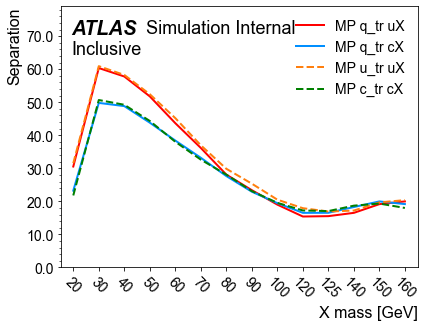

c1l4jex3bex
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-5-960baa34f174>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


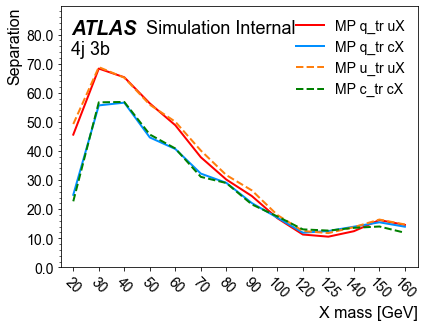

c1l4jex4bin
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-5-960baa34f174>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


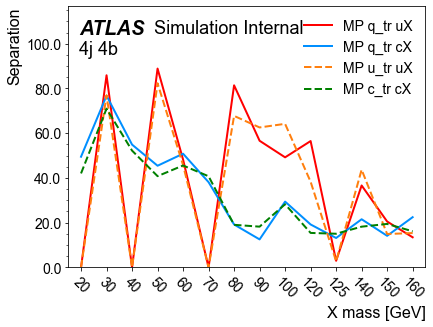

c1l5jex3bex
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-5-960baa34f174>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


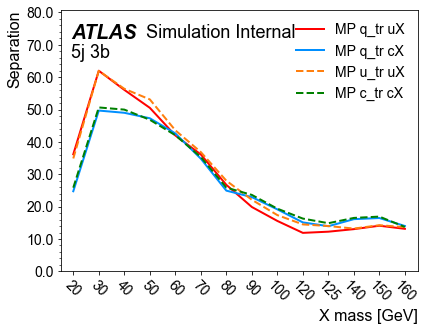

c1l5jex4bin
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-5-960baa34f174>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


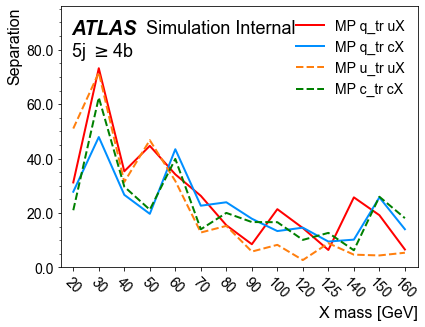

c1l6jin3bex
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-5-960baa34f174>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


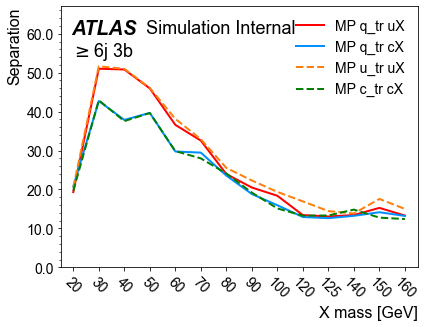

c1l6jin4bin
MP q_tr 14
MP u_tr 14
MP c_tr 14


<ipython-input-5-960baa34f174>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))


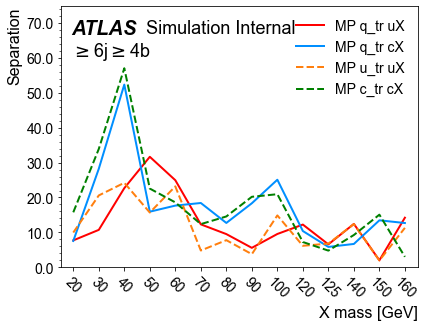

In [5]:
labels = {'all': "Inclusive","c1l4jex3bex": "4j 3b","c1l4jex4bin": r'4j 4b', "c1l5jex3bex":"5j 3b", "c1l5jex4bin": "5j "+r'$\geq$'+"4b",
                  "c1l6jin3bex": r'$\geq$6j'+" 3b","c1l6jin4bin": r'$\geq$6j$\geq$4b'}
regions= ['all'             ,'c1l4jex3bex'         ,'c1l4jex4bin'               , 'c1l5jex3bex'        , 'c1l5jex4bin',
                  'c1l6jin3bex'                   ,'c1l6jin4bin']

objects = [Train0_MP_q,Train0_MP_u,Train0_MP_c] #Put here the AUCs to plot
nameobjects = ["MP q_tr","MP u_tr","MP c_tr"] #Put here the names of the trainings
colorsu = ["red","tab:orange","tab:orange"] #Put here the color of the u evaluations
colorsc = [[0.,0.5615942,1.,1.],"green","green"] #Put here the color of c evaluations
styles = ["-","--","--"] #Put here the style of the trainigns

allmasses = [20,30,40,50,60,70,80,90,100,120,125,140,150,160]
for region in regions:
    print(region)
    plt.figure(figsize=(6.4,4.8),linewidth=0)
    for clf, nameclf,coloru,colorc,style in zip(objects, nameobjects,colorsu,colorsc,styles): #Iterate over trainings
        Xlist=list(clf[region].keys())
        Xlist.sort()
        print (nameclf, len(clf[region]))
        if "q_tr" in nameclf or "u_tr" in nameclf:   #Line for u score. If the score does not exist, skips the point
            plt.plot(np.arange(1,len(allmasses)+1,1),[clf[region][i][0] if i in Xlist else None for i in allmasses],label=nameclf+" uX",linewidth=2,color=coloru, linestyle=style)
        if "q_tr" in nameclf or "c_tr" in nameclf:   #Line for c score
            plt.plot(np.arange(1,len(allmasses)+1,1),[clf[region][i][1] if i in Xlist else None for i in allmasses],label=nameclf+" cX",linewidth=2,color=colorc, linestyle=style)
        
    plt.xlabel(r'X mass [GeV]',horizontalalignment='right',x=1,fontproperties=fm.FontProperties(fname=fpath,size=16))
    plt.ylabel("Separation",horizontalalignment='right',y=1,fontproperties=fm.FontProperties(fname=fpath,size=16))
    plt.xticks(np.arange(1,len(allmasses)+1,1))
    plt.xlim(0.5,14.5)
    uplim = plt.gca().get_ylim()[1]*1.25
    #if region in ['c1l4jex4bin']: # exception for region
    #    uplim=1.0
    plt.ylim(0,uplim)
    plt.gca().set_xticklabels(allmasses, rotation=-45, fontproperties=fm.FontProperties(fname=fpath,size=14))
    plt.gca().set_yticklabels([round(num,3) for num in plt.gca().get_yticks()], fontproperties=fm.FontProperties(fname=fpath,size=14))
    plt.gca().yaxis.set_minor_locator(tck.AutoMinorLocator())

    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),"ATLAS",va='top',ha='left',fontproperties=fm.FontProperties(fname=fbipath,size=20))
    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),"               Simulation Internal",va='top',ha='left',fontproperties=fm.FontProperties(fname=fpath,size=18))
    plt.text(ATLAS(plt.gca().get_xlim(),0.03),ATLAS(plt.gca().get_ylim(),0.95),"\n"+labels[region],va='top',ha='left',fontproperties=fm.FontProperties(fname=fpath,size=18))
    theloc = "best"
    if region in ['c1l5jex4bin','c1l4jex3bex','c1l5jex3bex']: # exception for region
        theloc = "upper right"
    plt.legend(loc=theloc,prop=fm.FontProperties(fname=fpath,size=14),frameon=False)
    plt.savefig(Output+"Sep"+region+".png",dpi=300,bbox_inches='tight')
    plt.show()
